In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR

from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.neighbors.kde import KernelDensity
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
data = "../data"

In [3]:
df_meas = pd.read_csv(data + "/IMPROVE_2015_measures_cs433.csv")
df_spec = pd.read_csv(data + "/IMPROVE_2015_raw_spectra_cs433.csv")
df_split = pd.read_csv(data + "/IMPROVE_2015_train_test_split_cs433.csv")
df_derive = pd.read_csv(data + "/IMPROVE_2015_2nd-derivative_spectra_cs433.csv")

## Data Exploration

In [4]:
df_meas.head()

,Unnamed: 0,site,SiteCode,Date,flag,Latitude,Longitude,ECf:Value,ECf:Unc,MF:Value,MF:Unc,OCf:Value,OCf:Unc,SO4f:Value,SO4f:Unc,NO3f:Value,NO3f:Unc,DUSTf:Value,DUSTf:Unc
0,0,CRLA1_04_21_2015_NM_0_csv,CRLA1,20150421,NM,42.8958,-122.1361,1.844414,1.023308,76.541793,2.718720,23.343977,3.196060,6.800987,0.142307,1.642580,0.095802,8.725530,0.758188
1,1,TONT1_05_09_2015_NM_0_csv,TONT1,20150509,NM,33.6548,-111.1068,0.218577,0.203142,23.273289,1.597004,3.774399,0.868154,3.132621,0.075339,2.733602,0.136727,4.686666,0.445060
2,2,BADL1_11_26_2015_NM_0_csv,BADL1,20151126,NM,43.7435,-101.9412,0.057109,0.178062,11.188888,1.473206,1.902453,0.738827,4.275544,0.113381,2.193672,0.136355,1.007311,0.121622
3,3,BRID1_10_27_2015_NM_0_csv,BRID1,20151027,NM,42.9749,-109.7579,0.090872,0.144012,6.564180,1.504830,1.569566,0.834177,0.788829,0.036832,0.556859,0.107056,0.337955,0.107560
4,4,SEQU1_04_03_2015_NM_0_csv,SEQU1,20150403,NM,36.4894,-118.8291,1.623977,0.971745,60.448977,2.306680,16.223032,2.258965,8.185925,0.169281,7.541357,0.309728,8.532945,0.735361


In [5]:
df_meas = df_meas.set_index("site")

In [6]:
df_OC = pd.DataFrame(df_meas[["OCf:Value","OCf:Unc"]]) #df_meas.loc[df_meas.flag == "NM",["OCf:Value","OCf:Unc"]] 

In [7]:
df_spec.head()

,wavenumber,ACAD1_01_06_2015_NM_0_csv,ACAD1_01_09_2015_NM_0_csv,ACAD1_01_12_2015_NM_0_csv,ACAD1_01_15_2015_NM_0_csv,ACAD1_01_18_2015_NM_0_csv,ACAD1_01_21_2015_NM_0_csv,ACAD1_01_24_2015_NM_0_csv,ACAD1_01_27_2015_NM_0_csv,ACAD1_01_30_2015_NM_0_csv,...,YOSE1_07_02_2015_FB_0_csv,YOSEX_01_15_2015_FB_0_csv,YOSEX_02_05_2015_FB_0_csv,YOSEX_05_21_2015_FB_0_csv,YOSEX_06_11_2015_FB_0_csv,YOSEX_09_03_2015_FB_0_csv,YOSEX_10_15_2015_FB_0_csv,YOSEX_11_05_2015_FB_0_csv,ZICA1_08_13_2015_FB_0_csv,ZICA1_09_03_2015_FB_0_csv
0,3998.423206,0.35778,0.58858,0.55091,0.49739,0.46597,0.42318,0.41571,0.34475,0.62313,...,0.24296,0.29209,0.40211,0.63614,0.54269,0.67122,0.53922,0.64828,0.40594,0.52207
1,3997.137539,0.35760,0.58832,0.55055,0.49715,0.46570,0.42296,0.41546,0.34452,0.62289,...,0.24282,0.29193,0.40188,0.63588,0.54250,0.67098,0.53898,0.64796,0.40579,0.52184
2,3995.851872,0.35743,0.58806,0.55019,0.49690,0.46543,0.42273,0.41520,0.34430,0.62265,...,0.24269,0.29177,0.40166,0.63563,0.54231,0.67074,0.53873,0.64762,0.40565,0.52161
3,3994.566206,0.35725,0.58781,0.54984,0.49665,0.46516,0.42250,0.41493,0.34407,0.62240,...,0.24255,0.29161,0.40143,0.63538,0.54213,0.67051,0.53848,0.64729,0.40550,0.52138
4,3993.280539,0.35708,0.58756,0.54948,0.49640,0.46489,0.42227,0.41466,0.34384,0.62215,...,0.24241,0.29145,0.40120,0.63512,0.54196,0.67027,0.53823,0.64696,0.40535,0.52114


## Data Processing

In [8]:
df_spec = df_spec.T

In [9]:
df_spec.head()

,0,1,2,3,4,5,6,7,8,9,...,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783
wavenumber,3998.423206,3997.137539,3995.851872,3994.566206,3993.280539,3991.994872,3990.709206,3989.423539,3988.137873,3986.852206,...,431.983986,430.698320,429.412653,428.126986,426.841320,425.555653,424.269986,422.984320,421.698653,420.412987
ACAD1_01_06_2015_NM_0_csv,0.357780,0.357600,0.357430,0.357250,0.357080,0.356890,0.356710,0.356520,0.356340,0.356150,...,-0.074765,-0.074292,-0.073728,-0.073047,-0.072208,-0.071185,-0.069949,-0.068499,-0.066864,-0.065079
ACAD1_01_09_2015_NM_0_csv,0.588580,0.588320,0.588060,0.587810,0.587560,0.587310,0.587070,0.586820,0.586570,0.586320,...,-0.099660,-0.099046,-0.098279,-0.097314,-0.096101,-0.094638,-0.092941,-0.091018,-0.088871,-0.086477
ACAD1_01_12_2015_NM_0_csv,0.550910,0.550550,0.550190,0.549840,0.549480,0.549120,0.548750,0.548380,0.548010,0.547640,...,-0.095560,-0.095277,-0.094907,-0.094408,-0.093729,-0.092851,-0.091786,-0.090555,-0.089180,-0.087647
ACAD1_01_15_2015_NM_0_csv,0.497390,0.497150,0.496900,0.496650,0.496400,0.496150,0.495900,0.495640,0.495390,0.495150,...,-0.105530,-0.105590,-0.105570,-0.105420,-0.105160,-0.104810,-0.104370,-0.103790,-0.103030,-0.102080


In [10]:
pd_merge = df_OC.merge(df_spec, right_index=True, left_index=True)

In [11]:
df_split = df_split.set_index("site", drop=True).drop(["Unnamed: 0"], axis=1)

In [12]:
pd_merge_again = pd_merge.merge(df_split, right_index=True, left_index=True)

In [13]:
pd_merge_again["OCf:Value"]

CRLA1_04_21_2015_NM_0_csv       23.343977
TONT1_05_09_2015_NM_0_csv        3.774399
BADL1_11_26_2015_NM_0_csv        1.902453
BRID1_10_27_2015_NM_0_csv        1.569566
SEQU1_04_03_2015_NM_0_csv       16.223032
PINN1_08_04_2015_NM_QC_0_csv     1.969049
PINN1_08_04_2015_NM_0_csv        1.969049
BRIS1_12_17_2015_NM_0_csv        9.704800
BRCA1_04_15_2015_NM_0_csv        1.304018
WHIT1_12_14_2015_NM_0_csv        1.178174
DOME1_08_31_2015_NM_0_csv       24.109274
GLAC1_04_09_2015_NM_0_csv        7.833412
LOST1_03_07_2015_NM_0_csv        3.838577
MAKA2_03_31_2015_NM_0_csv        0.127425
ELLI1_08_13_2015_NM_2_0_csv     16.295581
BADL1_10_09_2015_NM_0_csv       21.264523
MOZI1_04_15_2015_NM_0_csv        1.834183
IKBA1_01_06_2015_NM_0_csv        4.680329
SHEN1_02_08_2015_NM_0_csv       16.457420
PHOE5_11_23_2015_NM_0_csv       35.038568
MORA1_04_21_2015_NM_0_csv        8.615637
BYIS1_08_07_2015_NM_0_csv        1.922358
SIPS1_08_01_2015_NM_0_csv       13.305918
NOCA1_10_06_2015_NM_0_csv       16

In [14]:
set_train = pd_merge_again[pd_merge_again["usage"] == "calibration"]

In [15]:
set_test = pd_merge_again[pd_merge_again["usage"] == "test"]

In [16]:
df_OCU_tr = set_train["OCf:Unc"]
df_OCU_te = set_test["OCf:Unc"]

In [17]:
y_tr = set_train["OCf:Value"]
y_te = set_test["OCf:Value"]
x_tr = set_train.drop(["OCf:Value","OCf:Unc","usage"], axis=1)
x_te = set_test.drop(["OCf:Value","OCf:Unc","usage"], axis=1)

In [110]:
# helping function for comparing bias plot 
def compute_bias_metric(bias, SNR):
    
    # k = percent of data size for smoothing
    k = 0.1
    
    
    # take only samples with SNR > 2
    SNR_ind2 = np.argwhere(SNR > 2)
    
    bias_n = bias[SNR_ind2]
    snr_n = SNR[SNR_ind2]
    
    bandwidth = round(k*len(snr_n))

    # Smoother = Moving average, bandwidth of 10% of Data
    y = []
    x = []
    for i in range(int(k*100)):
        y.append(np.mean(bias_n[i*bandwidth:(i+1)*bandwidth]))
        x.append(np.mean(snr_n[i*bandwidth:(i+1)*bandwidth]))

    # Display moving average of normalized bias
    plt.figure(figsize=(16,9))
    plt.scatter(x, y, s=10)
    #plt.ylim([-0.1, 0.1])
    plt.show()
    
    # rerturn max Amplitude
    print("Max Amplitude: ",np.max(np.abs(y)))
    return np.max(np.abs(y))

In [111]:
r2 = []
bias_met = []

### LinearRegression

In [52]:
lr = LinearRegression()

In [20]:
cross_val_score(lr, x_tr, y_tr, cv=10)

array([0.9527986 , 0.97138097, 0.98517212, 0.97723736, 0.97413276,
       0.98552312, 0.98031491, 0.98466993, 0.98919717, 0.97822009])

In [53]:
lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
y_pred_tr = lr.predict(x_tr)
y_pred_te = lr.predict(x_te)

Text(0,0.5,'Predicted y')

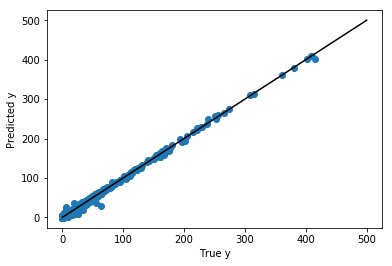

In [55]:
plt.scatter(y_tr,y_pred_tr)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [121]:
r2.append(r2_score(y_tr,y_pred_tr))

In [57]:
bias_tr = (y_pred_tr - y_tr) / df_OCU_tr
#bias_te = (y_te - y_pred_te) / df_OCU_te

In [58]:
SNR_tr = y_tr / df_OCU_tr
SNR_te = y_te / df_OCU_te

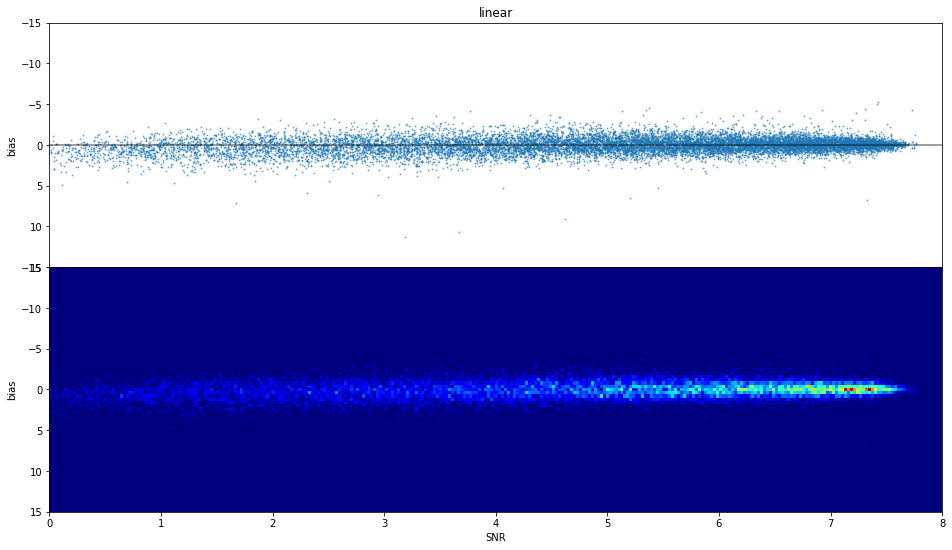

In [59]:
# Two subplots
f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_tr,bias_tr, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_tr,bias_tr, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("linear")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

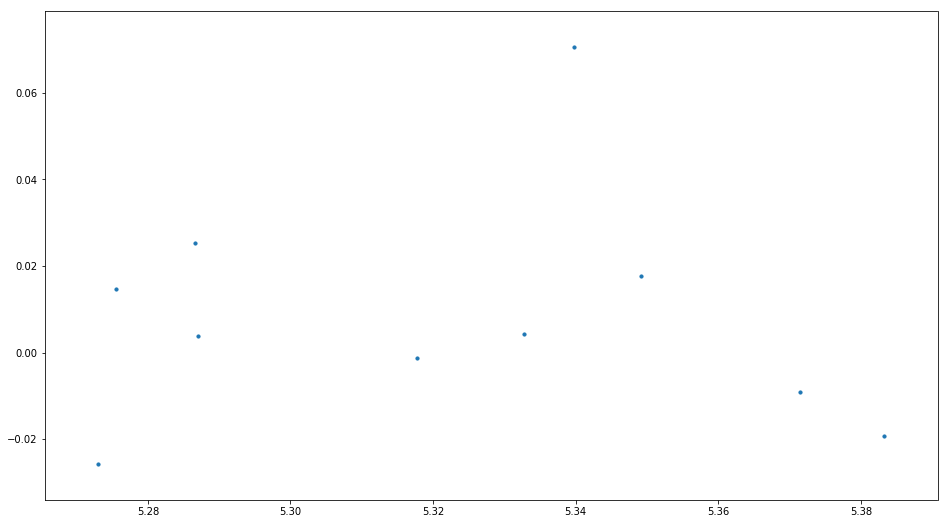

Max Amplitude:  0.07062577436030301


In [112]:
bias_met.append(compute_bias_metric(bias_tr, SNR_tr))

### Ridge regression

In [61]:
ridge = Ridge(alpha=1e-7)

In [170]:
cross_val_score(ridge,x_tr,y_tr, cv=10)

array([0.95750891, 0.97362895, 0.98741217, 0.98317205, 0.97575937,
       0.98757499, 0.98288728, 0.98706775, 0.98999763, 0.98259806])

In [62]:
ridge.fit(x_tr,y_tr)
y_pred_tr_ridge = ridge.predict(x_tr)
#y_pred_te_ridge = ridge.predict(x_te)

Text(0,0.5,'Predicted y')

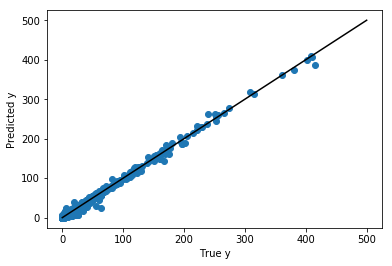

In [63]:
plt.scatter(y_tr,y_pred_tr_ridge)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")


In [122]:
r2.append(r2_score(y_tr,y_pred_tr_ridge))

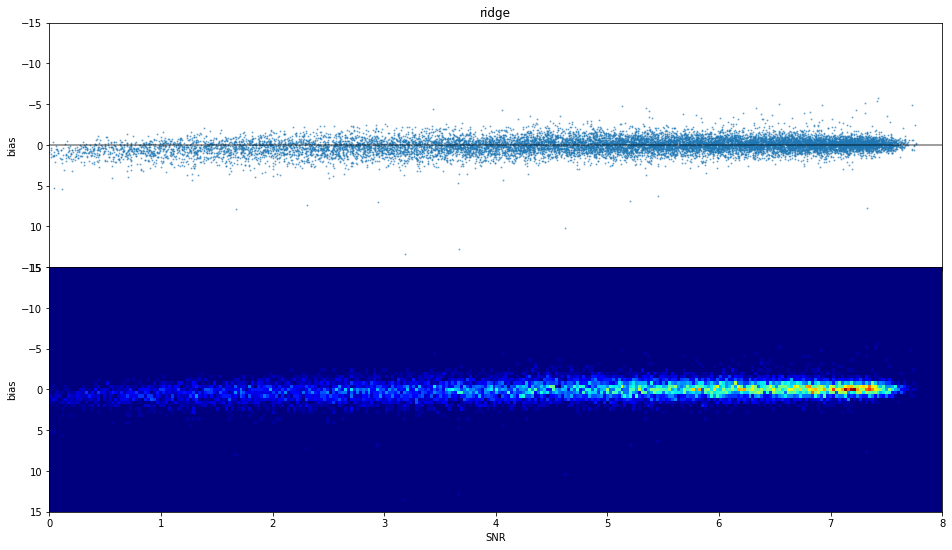

In [65]:
bias_tr_ridge = (y_pred_tr_ridge - y_tr) / df_OCU_tr

f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_tr,bias_tr_ridge, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_tr,bias_tr_ridge, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("ridge")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

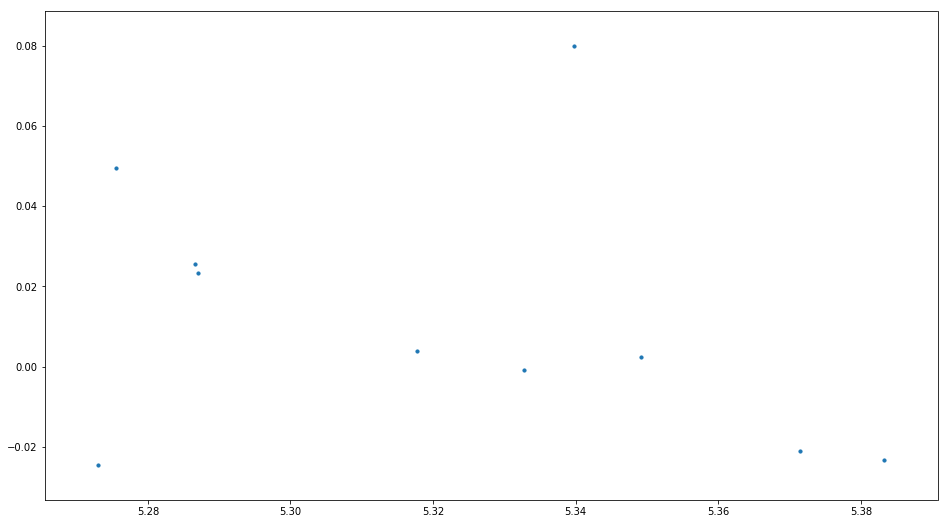

Max Amplitude:  0.08001067782292717


In [113]:
bias_met.append(compute_bias_metric(bias_tr_ridge, SNR_tr))

### Neural Network

In [67]:
nn = MLPRegressor()

In [68]:
nn.fit(x_tr,y_tr)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [69]:
y_pred_tr_nn = nn.predict(x_tr)

Text(0,0.5,'Predicted y')

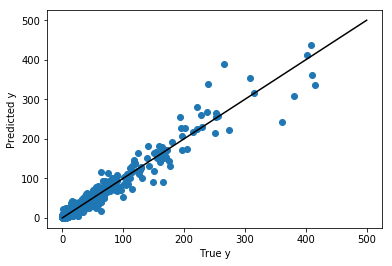

In [70]:
plt.scatter(y_tr,y_pred_tr_nn)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [123]:
r2.append(r2_score(y_tr,y_pred_tr_nn))

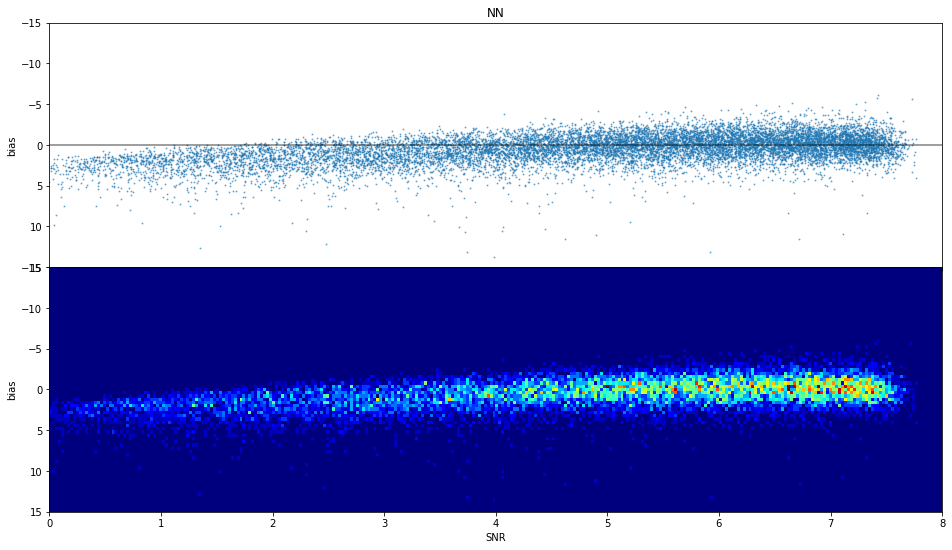

In [72]:
bias_tr_nn = (y_pred_tr_nn - y_tr) / df_OCU_tr

f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_tr,bias_tr_nn, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_tr,bias_tr_nn, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("NN")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

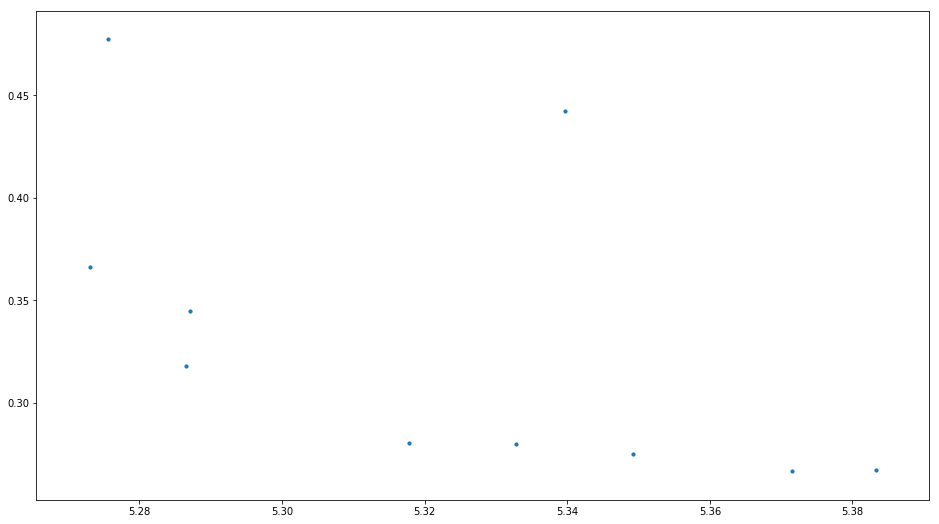

Max Amplitude:  0.47729726837840525


In [114]:
bias_met.append(compute_bias_metric(bias_tr_nn, SNR_tr))

### SVR (too slow to CV)

In [20]:
svr = SVR()
svr.fit(x_tr,y_tr)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
y_pred_tr_svr = svr.predict(x_tr)

In [29]:
r2_score(y_tr,y_pred_tr_svr)

0.2183425474217131

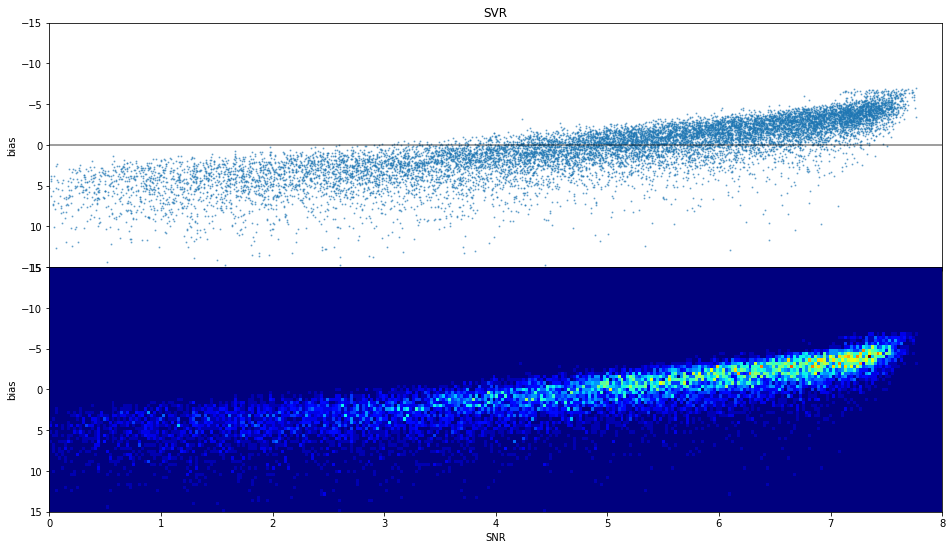

In [25]:
bias_tr_svr = (y_pred_tr_svr - y_tr) / df_OCU_tr

f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_tr,bias_tr_svr, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_tr,bias_tr_svr, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("SVR")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

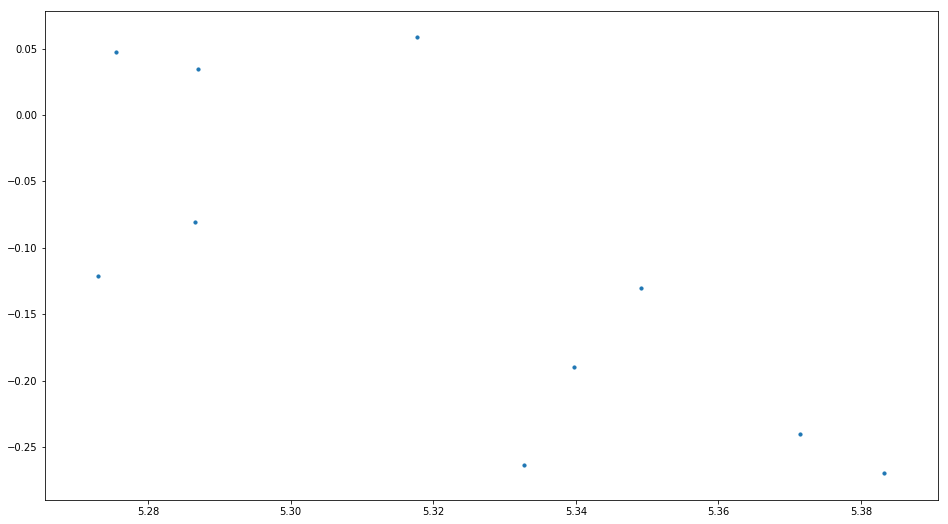

Max Amplitude:  0.26986526960047375


In [30]:
compute_bias_metric(bias_tr_svr, SNR_tr)

### RandomForestRegressor (sloooooooooww)

In [49]:
rfr = RandomForestRegressor()
rfr.fit(x_tr,y_tr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:
y_pred_tr_rfr = rfr.predict(x_tr)

In [124]:
r2.append(r2_score(y_tr,y_pred_tr_rfr))

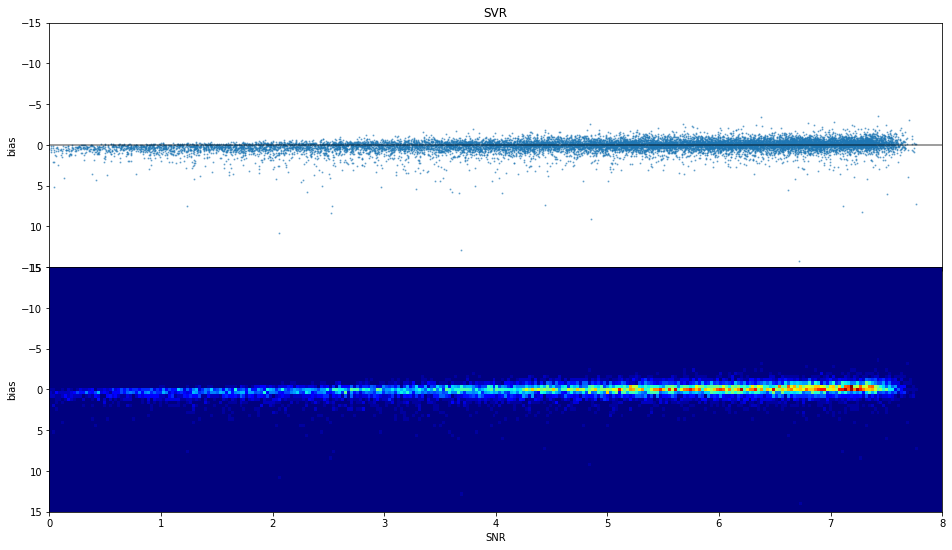

In [75]:
bias_tr_rfr = (y_pred_tr_rfr - y_tr) / df_OCU_tr

f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_tr,bias_tr_rfr, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_tr,bias_tr_rfr, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("SVR")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

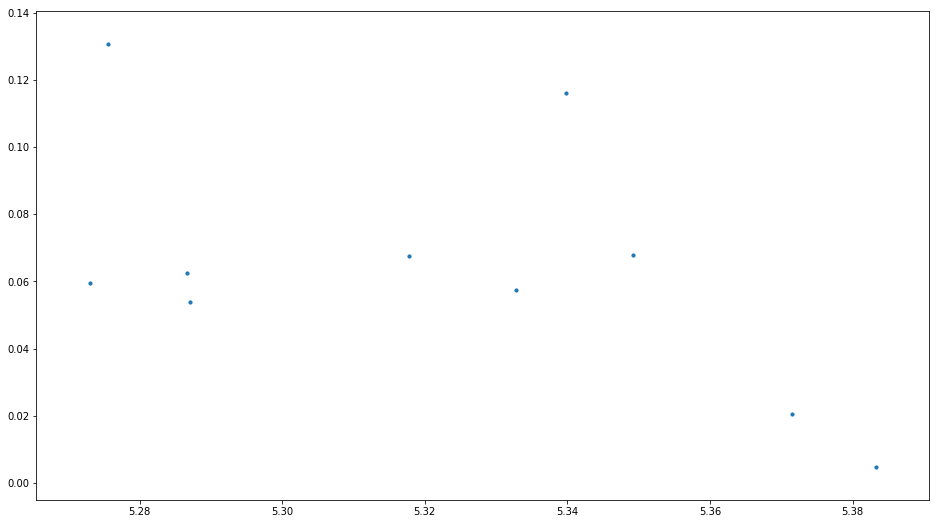

Max Amplitude:  0.13083886488513305


In [115]:
bias_met.append(compute_bias_metric(bias_tr_rfr, SNR_tr))

### PLOT R2 vs bias_metric (TODO with validation set)

In [127]:
bias_met

[0.07062577436030301,
 0.08001067782292717,
 0.47729726837840525,
 0.13083886488513305]

In [209]:
def choose_best(r2,bias_met):
    n = ["Linear","Ridge","NeuralNet","RandomForest"]
    r2_new = 1-np.array(r2)
    fig, ax = plt.subplots()
    ax.scatter(1-np.array(r2),bias_met, marker="o", s=500)
    ax.set_xlabel('Bias_metric')
    ax.set_ylabel('1 - R2')
    plt.subplots_adjust(left=0, bottom=0, right=3, top=1, wspace=None, hspace=None)
    for i, txt in enumerate(n):
        ax.annotate(txt, (r2_new[i], bias_met[i]))
    
    distance = []
    for elem1, elem2 in zip(r2_new,bias_met):
        distance.append(np.linalg.norm([elem1,elem2]))
        
    return print("Best model: ", n[np.argmin(distance)])

Best model:  Linear


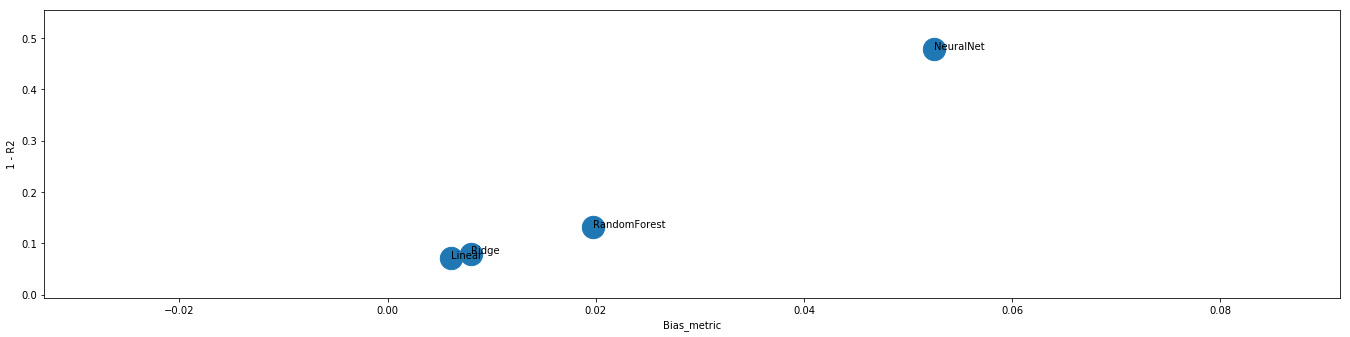

In [210]:
choose_best(r2,bias_met)

### 2nd derivative

In [43]:
df_derive = df_derive.T

In [44]:
pd_der_merge = df_OC.merge(df_derive, right_index=True, left_index=True)

In [45]:
df_split.head(9)

,usage
site,
CRLA1_04_21_2015_NM_0_csv,calibration
TONT1_05_09_2015_NM_0_csv,calibration
BADL1_11_26_2015_NM_0_csv,calibration
BRID1_10_27_2015_NM_0_csv,calibration
SEQU1_04_03_2015_NM_0_csv,calibration
PINN1_08_04_2015_NM_QC_0_csv,calibration
BRIS1_12_17_2015_NM_0_csv,calibration
BRCA1_04_15_2015_NM_0_csv,calibration
ORPI1_09_03_2015_FB_0_csv,calibration


In [46]:
pd_der_again = pd_der_merge.merge(df_split, right_index=True, left_index=True)

In [47]:
set_train_der = pd_der_again[pd_der_again["usage"] == "calibration"]

In [48]:
set_test_der = pd_der_again[pd_der_again["usage"] == "test"]

In [49]:
y_tr_der = set_train_der["OCf:Value"]
y_te_der = set_test_der["OCf:Value"]
x_tr_der = set_train_der.drop(["OCf:Value","OCf:Unc","usage"], axis=1)
x_te_der = set_test_der.drop(["OCf:Value","OCf:Unc","usage"], axis=1)

In [50]:
lr.fit(x_tr_der,y_tr_der)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
der_predict_tr = lr.predict(x_tr_der)

Text(0,0.5,'Predicted y')

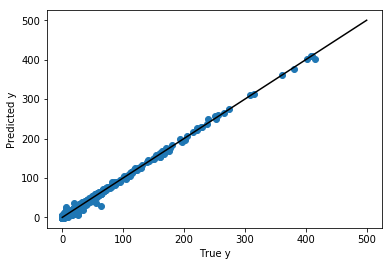

In [52]:
plt.scatter(y_tr,der_predict_tr)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [53]:
r2_score(y_tr,der_predict_tr)

0.9938977307958035

In [ ]:
#x_tr_der[x_tr_der.index.contains("_NM_")]

## FEATURE REDUCTION

In [106]:
# Compute PCA keeping only he n_components
pca = PCA(n_components=100)

In [107]:
# fit and transform train set and transform test set
pca_tr = pca.fit_transform(x_tr)
pca_te = pca.transform(x_te)

In [108]:
#fit linear Regression model on PCA data
lr.fit(pca_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
y_pred_pca = lr.predict(pca_te)

Text(0,0.5,'Predicted y')

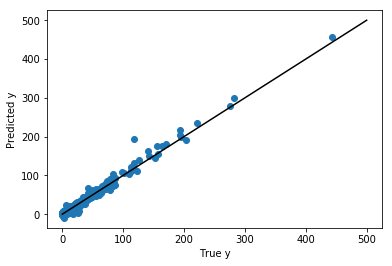

In [110]:
# display plot to see "accuracy" of the model
plt.scatter(y_te,y_pred_pca)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [111]:
r2_score(y_te,y_pred_pca)

0.9794986829514511

**Almost as good as the linear model without feature reduction but here only using 100 features =0**

In [167]:
# Check performance of pca models with different number of components #TODO try with more
max_pca_feat = 200

def compute_scores(X,y):
    """Compute cross-validation on pca model with different number of components"""
    pca = PCA()
    pca_scores = []
    
    for n_feat in range(1,max_pca_feat):
        pca.n_components = n_feat
        pca_scores.append(np.mean(cross_val_score(pca,X,y, cv=3)))
        print(n_feat)
    return pca_scores

In [168]:
# trick: Use pickle to avoid recalculating
import pickle

def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

def save_pickle(result, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(result, file)

def features_computation(X,y):
    try:
        return load_pickle('./pca_cv_scores')
    except (FileNotFoundError, EOFError) as e:
        pca_scores = compute_scores(X,y)
        save_pickle(pca_scores, './pca_cv_scores')
        return pca_scores

In [170]:
# compute cv_score of pca models with different number of components
pca_scores = features_computation(x_tr,y_tr)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


Text(0.5,1,'Number of Features')

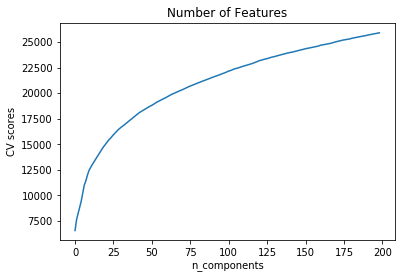

In [171]:
# Display plot to help determine how many features to keep to not lose too much information
plt.plot(pca_scores)
plt.ylabel("CV scores")
plt.xlabel("n_components")
plt.title("Number of Features")

## TRAINING SET REDUCTION

In [150]:
# Check performance of pca models with diff training set size // n_components = 100 determined in the above cell
def compute_min_set(X,y):
    """Compute cross-validation on pca model with different training set size"""
    
    pca = PCA(n_components=200)
    pca_scores = []
    length = X.shape[0]
    k = 50
    div = round(length/k)
    for i in range(k):
        pca_scores.append(np.mean(cross_val_score(pca,X.iloc[:(1+i)*div,:],y[:(1+i)*div], cv=3)))
        print(i)
    return pca_scores

In [151]:
# compute cv_score of pca model with increasing training set size
min_set_score = compute_min_set(x_tr,y_tr)

/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/decomposition/base.py:73: RuntimeWarning: divide by zero encountered in true_divide
  precision = np.dot(components_, components_.T) / self.noise_variance_
/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/decomposition/base.py:73: RuntimeWarning: invalid value encountered in true_divide
  precision = np.dot(components_, components_.T) / self.noise_variance_


ValueError: array must not contain infs or NaNs

Text(0.5,1,'Training set size')

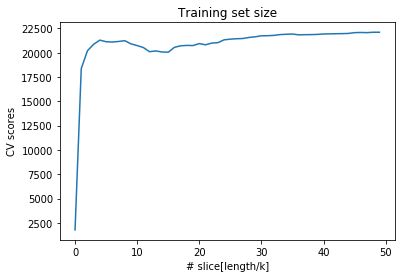

In [177]:
# Display plot
plt.plot(min_set_score)
plt.ylabel("CV scores")
plt.xlabel("# slice[length/k]")
plt.title("Training set size")

In [142]:
# index of the highest to the lowest values
np.argsort(min_set_score)[::-1]

array([49, 48, 46, 47, 45, 44, 43, 42, 41, 40, 35, 34, 39, 33, 38, 37, 36,
       32, 31, 30, 29, 28, 27, 26, 25, 24,  4,  8,  7,  5,  6, 23, 22, 20,
        9,  3, 21, 18, 19, 10, 17, 16, 11,  2, 13, 12, 14, 15,  1,  0])

**We can see that, we could take only ~ 8/50 of the train set to get almost the same performance**

0.9753457957443782

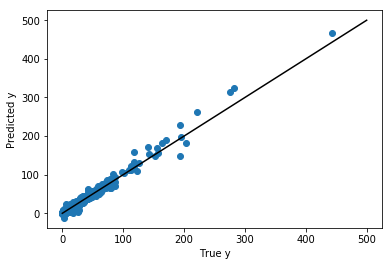

In [161]:
# Test what we found 
pca = PCA(n_components=100)
k = 50
length = x_tr.shape[0]
div = round(length/k)
slices = 8
ind = round(slices*div)
x_train = x_tr.iloc[:ind,:]
y_train = y_tr[:ind]

pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_te)

lr.fit(pca_train, y_train)

y_pred_pca = lr.predict(pca_test)

plt.scatter(y_te,y_pred_pca)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

r2_score(y_te,y_pred_pca)

Text(0,0.5,'bias')

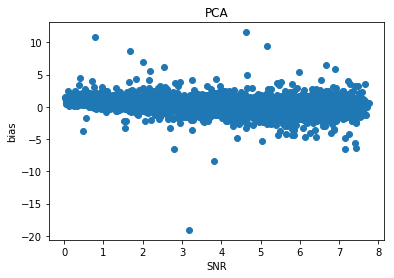

In [162]:
bias_test = (y_pred_pca - y_te) / df_OCU_te

plt.scatter(SNR_te,bias_test)
plt.title("PCA")
plt.xlabel("SNR")
plt.ylabel("bias")

### PCR with linear regression

0.9855004332097201

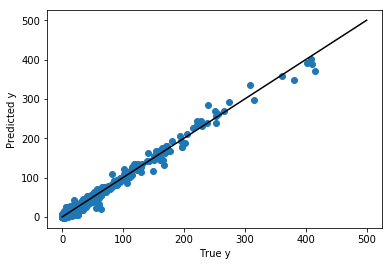

In [43]:
pca = PCA(n_components=100)

pca_tr = pca.fit_transform(x_tr)

lr.fit(pca_tr, y_tr)

y_pred_tr_pcr = lr.predict(pca_tr)

plt.scatter(y_tr,y_pred_tr_pcr)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

r2_score(y_tr,y_pred_tr_pcr)

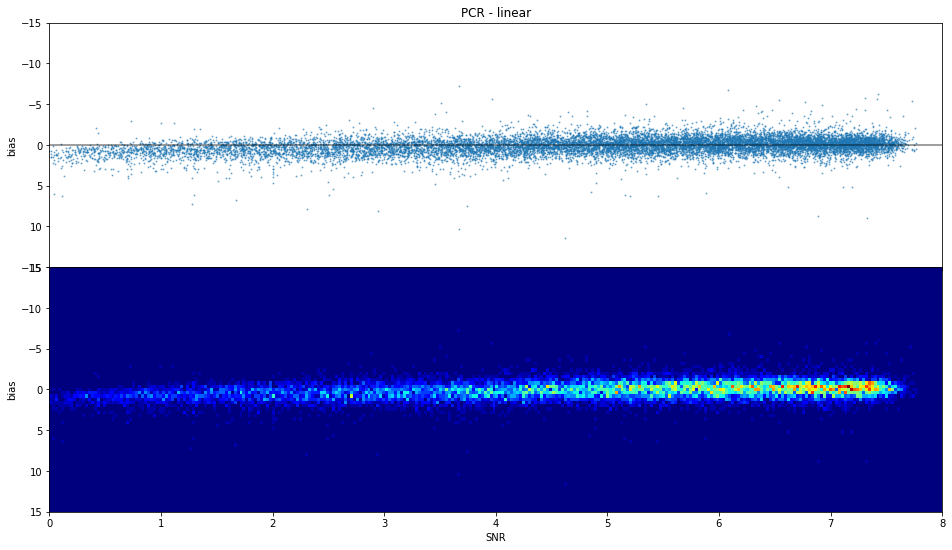

In [44]:
bias_tr_pcr = (y_pred_tr_pcr - y_tr) / df_OCU_tr

f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_tr,bias_tr_pcr, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_tr,bias_tr_pcr, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("PCR - linear")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

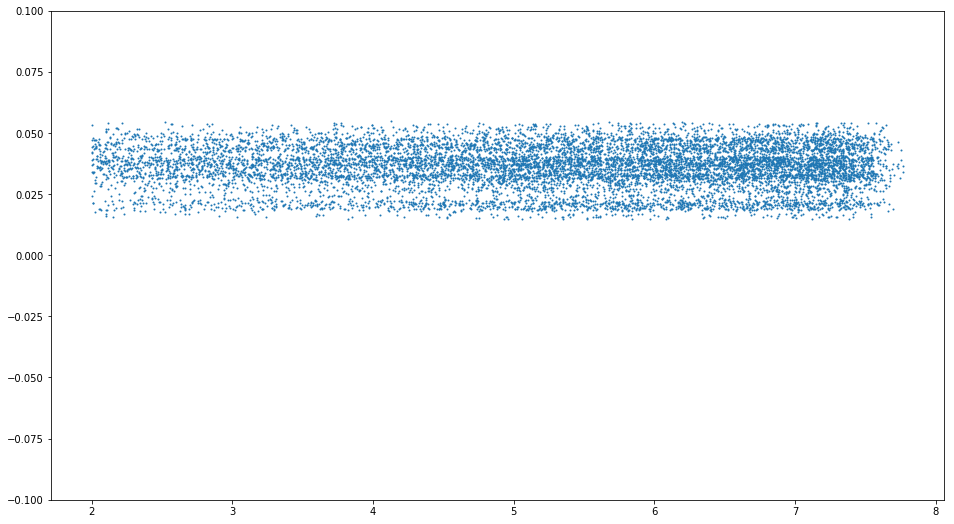

Max Amplitude:  0    0.054714
dtype: float64


In [45]:
compute_bias_metric(bias_tr_pcr, SNR_tr)

### PCR with ridge

0.9854940356248026

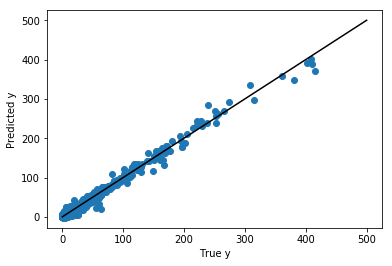

In [46]:
pca = PCA(n_components=100)

pca_tr = pca.fit_transform(x_tr)

ridge1 = Ridge(alpha=1e-7)
ridge1.fit(pca_tr, y_tr)

y_pred_tr_pcr_ridge = ridge1.predict(pca_tr)

plt.scatter(y_tr,y_pred_tr_pcr_ridge)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

r2_score(y_tr,y_pred_tr_pcr_ridge)

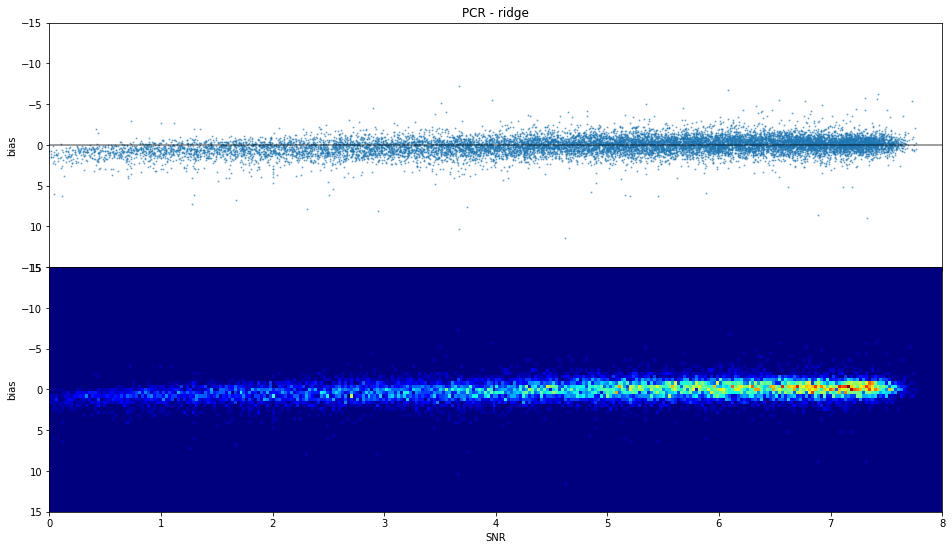

In [47]:
bias_tr_pcr_ridge = (y_pred_tr_pcr_ridge - y_tr) / df_OCU_tr

f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))

axarr[0].scatter(SNR_tr,bias_tr_pcr_ridge, s=1, alpha= 0.5)
axarr[1].hist2d(SNR_tr,bias_tr_pcr_ridge, bins=(300, 75), cmap=plt.cm.jet,range=[[0, 8], [-15, 15]])
axarr[0].set_ylim(15,-15)
axarr[0].axhline(y=0, color='black', alpha=0.5)
axarr[0].set_title("PCR - ridge")
axarr[1].set_xlabel("SNR")
axarr[1].set_ylabel("bias")
axarr[0].set_ylabel("bias")

f.subplots_adjust(hspace=0)

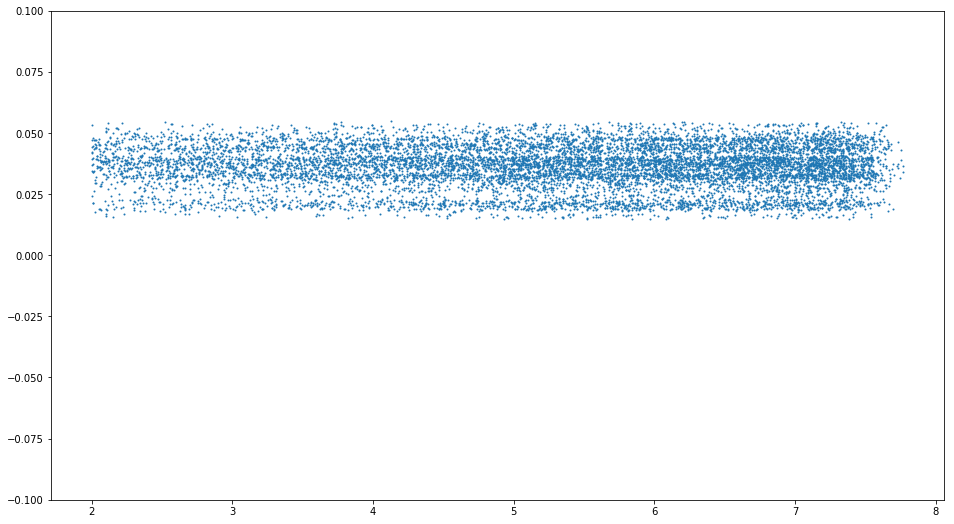

Max Amplitude:  0    0.054791
dtype: float64


In [48]:
compute_bias_metric(bias_tr_pcr_ridge, SNR_tr)